In [1]:
#!pip install polaris-ml
#!pip install fets
#!pip install mlflow
#!pip install --upgrade pip
#!pip install causalnex
#!python -c "import causalnex"
#!pip install torch
#!pip install pygraphviz

In [20]:

import warnings
from causalnex.structure import StructureModel

warnings.filterwarnings("ignore")  # silence warnings

sm = StructureModel()

print("Ok")


Ok


In [3]:

sm.add_edges_from([
    ('health', 'absences'),
    ('health', 'G1')
])

print("Ok")


Ok


In [4]:
sm.edges

OutEdgeView([('health', 'absences'), ('health', 'G1')])

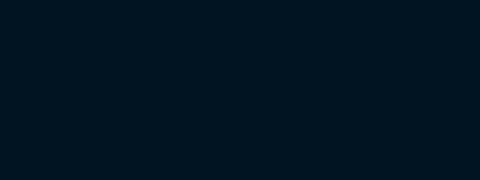

In [31]:
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE

viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
Image(viz.draw(format='png'))

In [6]:
import pandas as pd

data = pd.read_csv('student-por.csv', delimiter=';')
data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [7]:
drop_col = ['school','sex','age','Mjob', 'Fjob','reason','guardian']
data = data.drop(columns=drop_col)
data.head(5)

,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,U,GT3,A,4,4,2,2,0,yes,no,...,4,3,4,1,1,3,4,0,11,11
1,U,GT3,T,1,1,1,2,0,no,yes,...,5,3,3,1,1,3,2,9,11,11
2,U,LE3,T,1,1,1,2,0,yes,no,...,4,3,2,2,3,3,6,12,13,12
3,U,GT3,T,4,2,1,3,0,no,yes,...,3,2,2,1,1,5,0,14,14,14
4,U,GT3,T,3,3,1,2,0,no,yes,...,4,3,2,1,2,5,0,11,13,13


In [8]:
import numpy as np

struct_data = data.copy()
non_numeric_columns = list(struct_data.select_dtypes(exclude=[np.number]).columns)

print(non_numeric_columns)

['address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in non_numeric_columns:
    struct_data[col] = le.fit_transform(struct_data[col])

struct_data.head(5)

,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,0,0,4,4,2,2,0,1,0,...,4,3,4,1,1,3,4,0,11,11
1,1,0,1,1,1,1,2,0,0,1,...,5,3,3,1,1,3,2,9,11,11
2,1,1,1,1,1,1,2,0,1,0,...,4,3,2,2,3,3,6,12,13,12
3,1,0,1,4,2,1,3,0,0,1,...,3,2,2,1,1,5,0,14,14,14
4,1,0,1,3,3,1,2,0,0,1,...,4,3,2,1,2,5,0,11,13,13


In [10]:
from causalnex.structure.notears import from_pandas

sm = from_pandas(struct_data)

print("Ok")

Ok


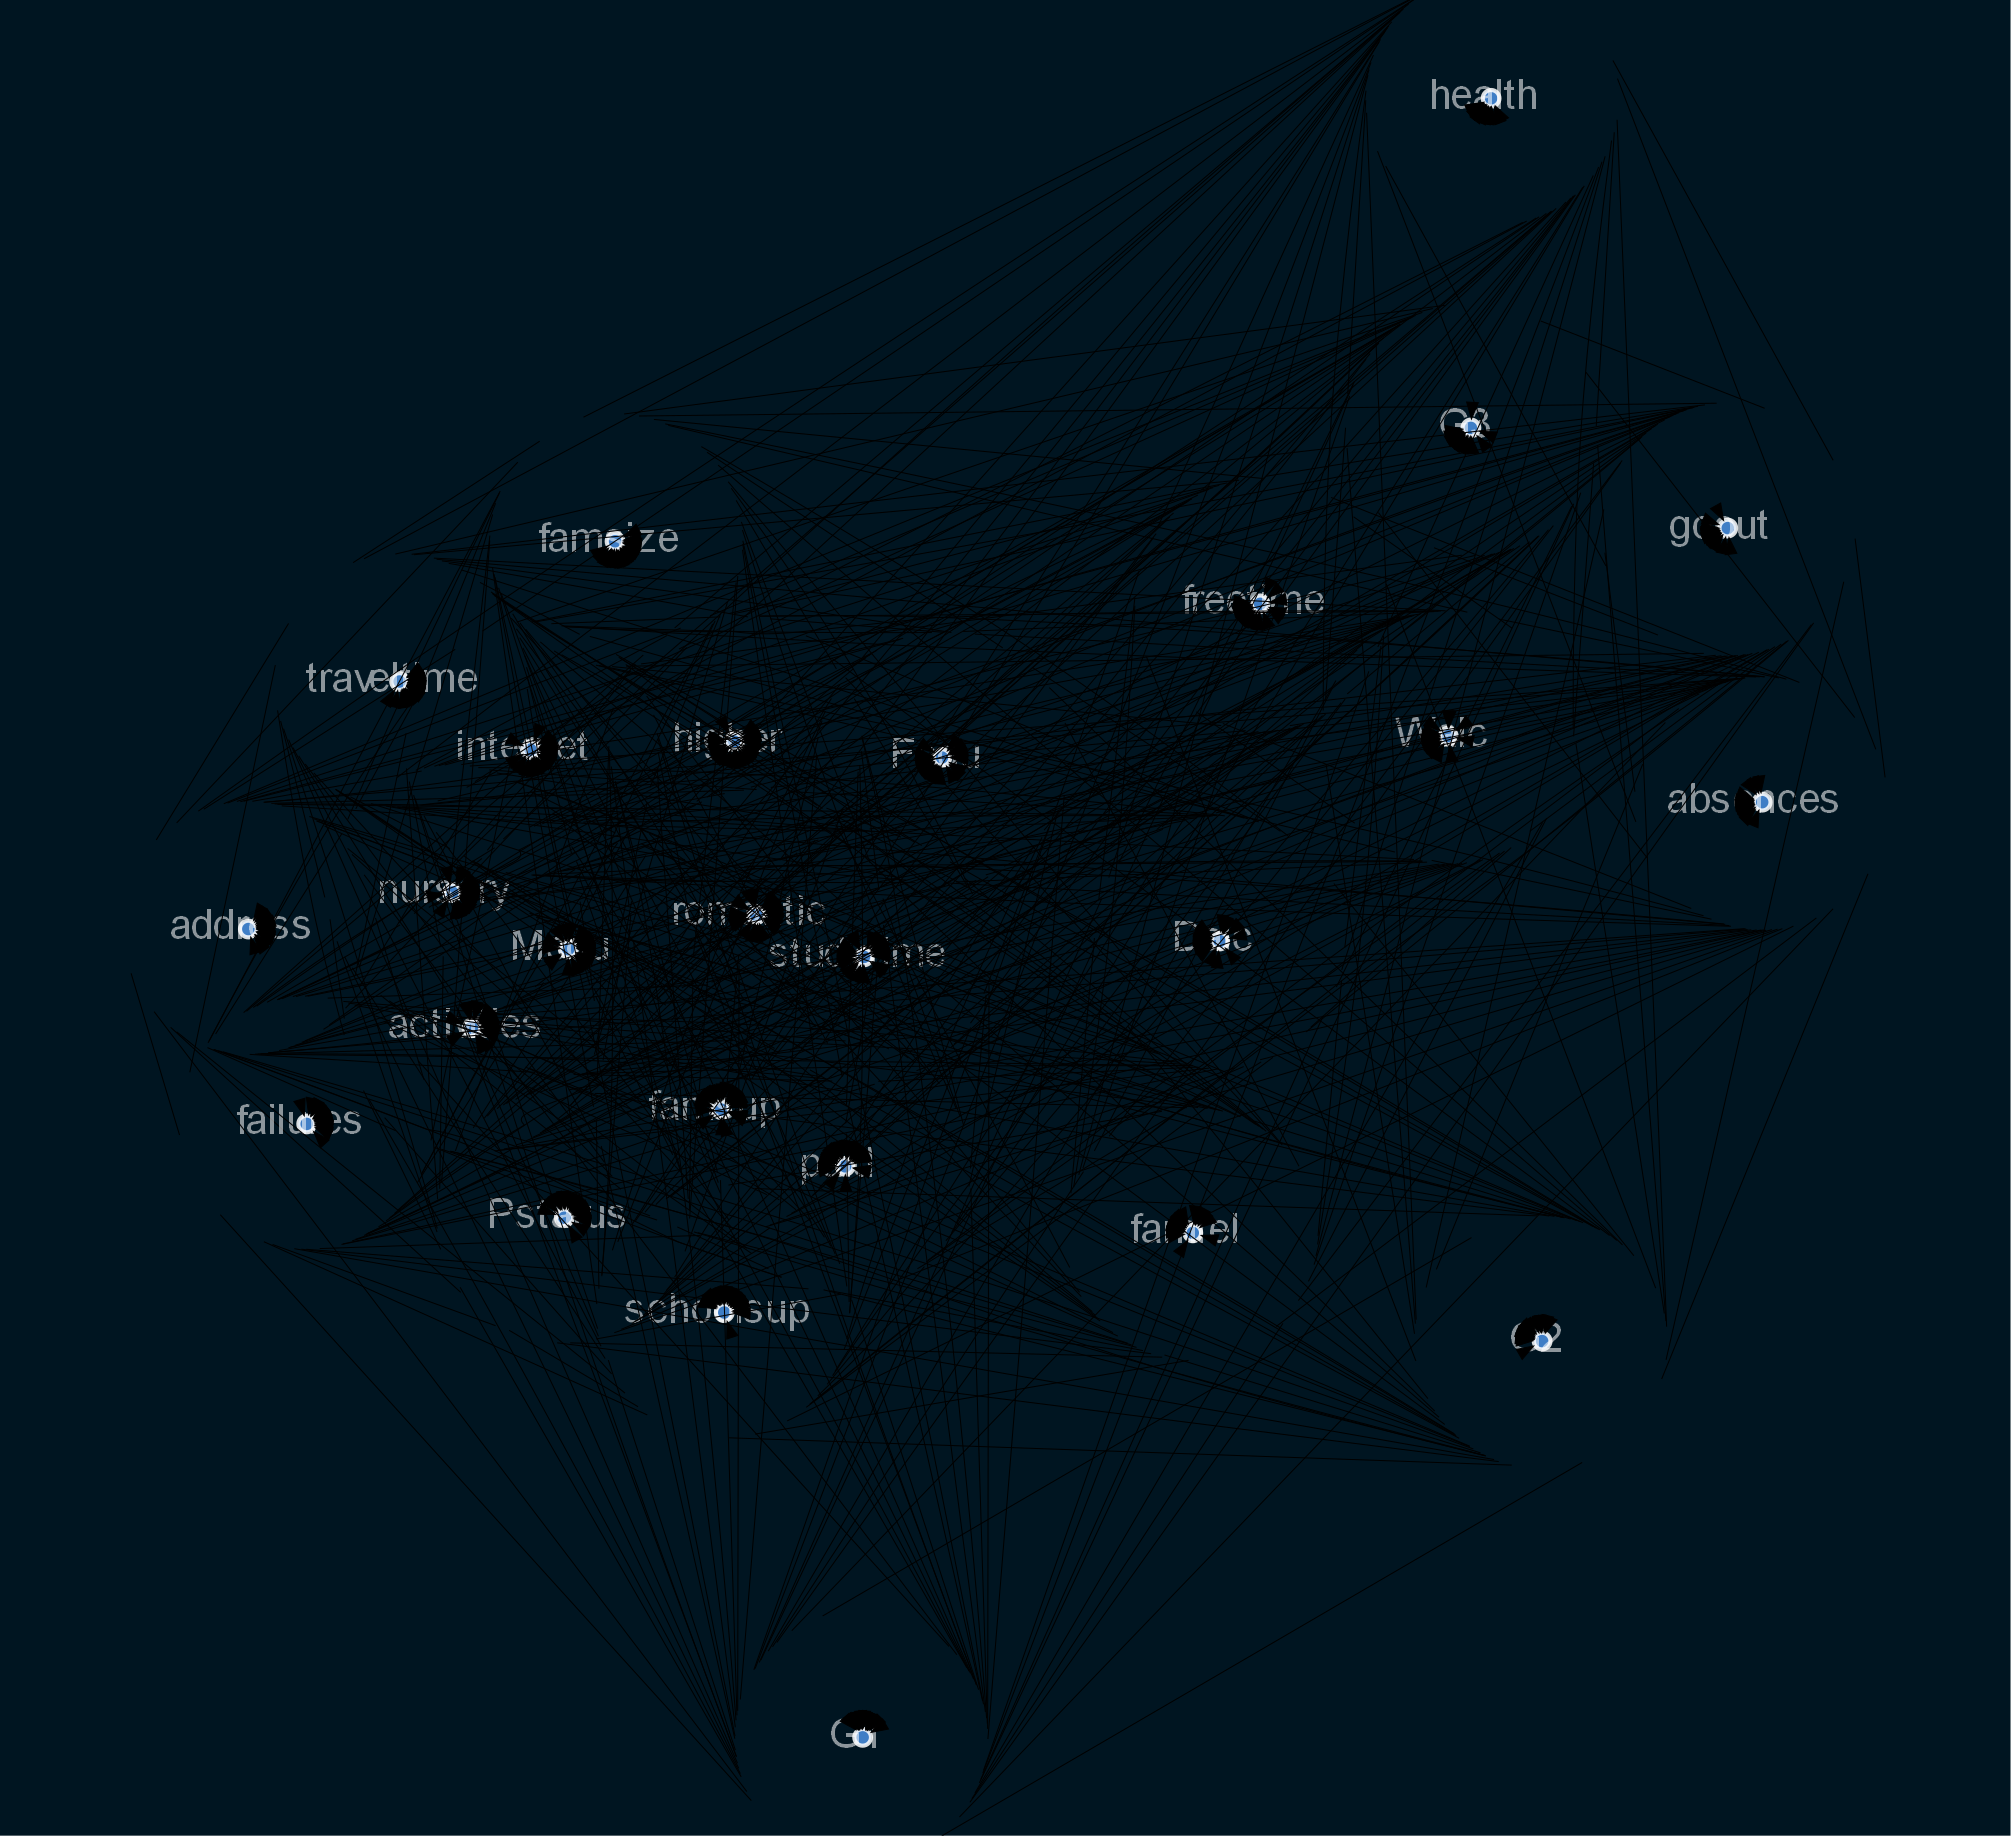

In [11]:
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
    prog='fdp',
)
Image(viz.draw(format='png'))

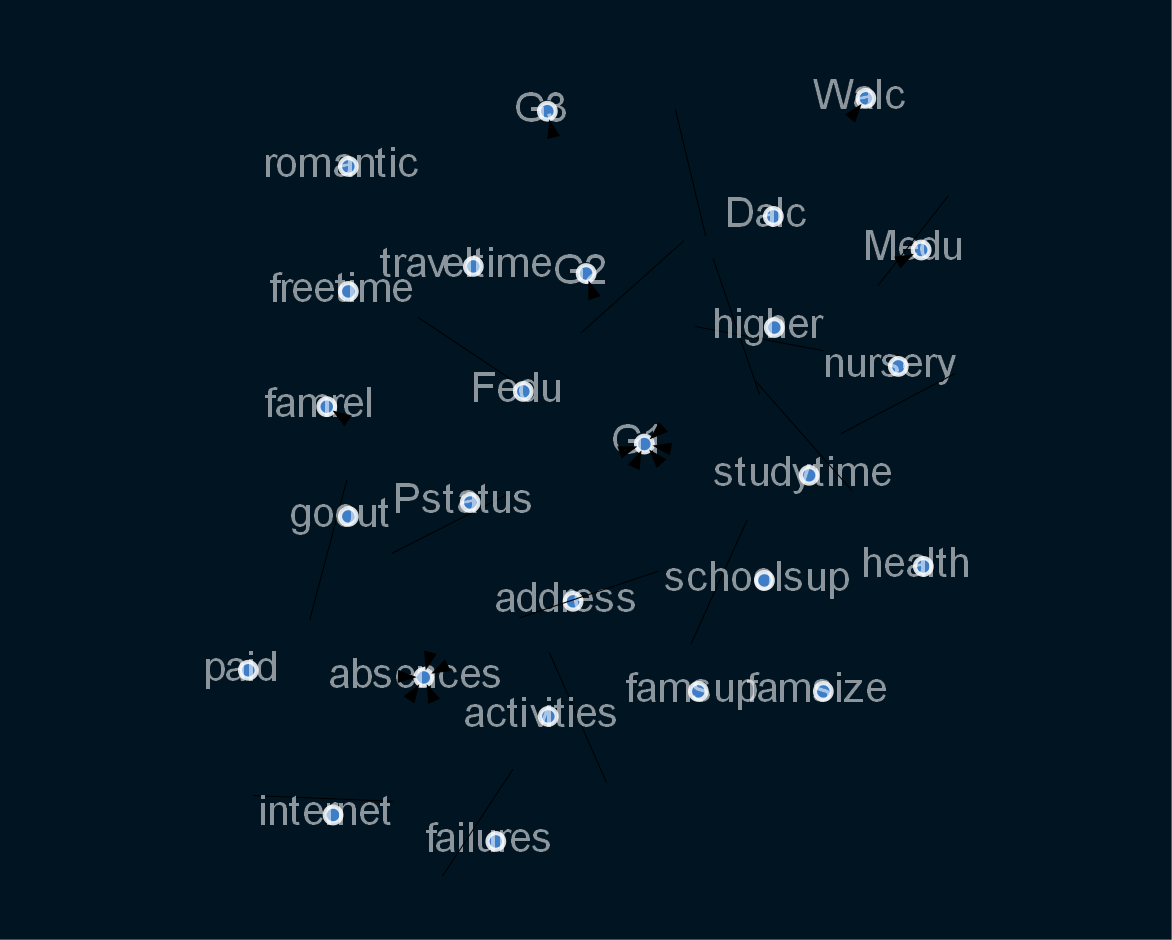

In [12]:

sm.remove_edges_below_threshold(0.8)
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
Image(viz.draw(format='png'))

In [13]:
sm = from_pandas(struct_data, tabu_edges=[("higher", "Medu")], w_threshold=0.8)
print("Ok")

Ok


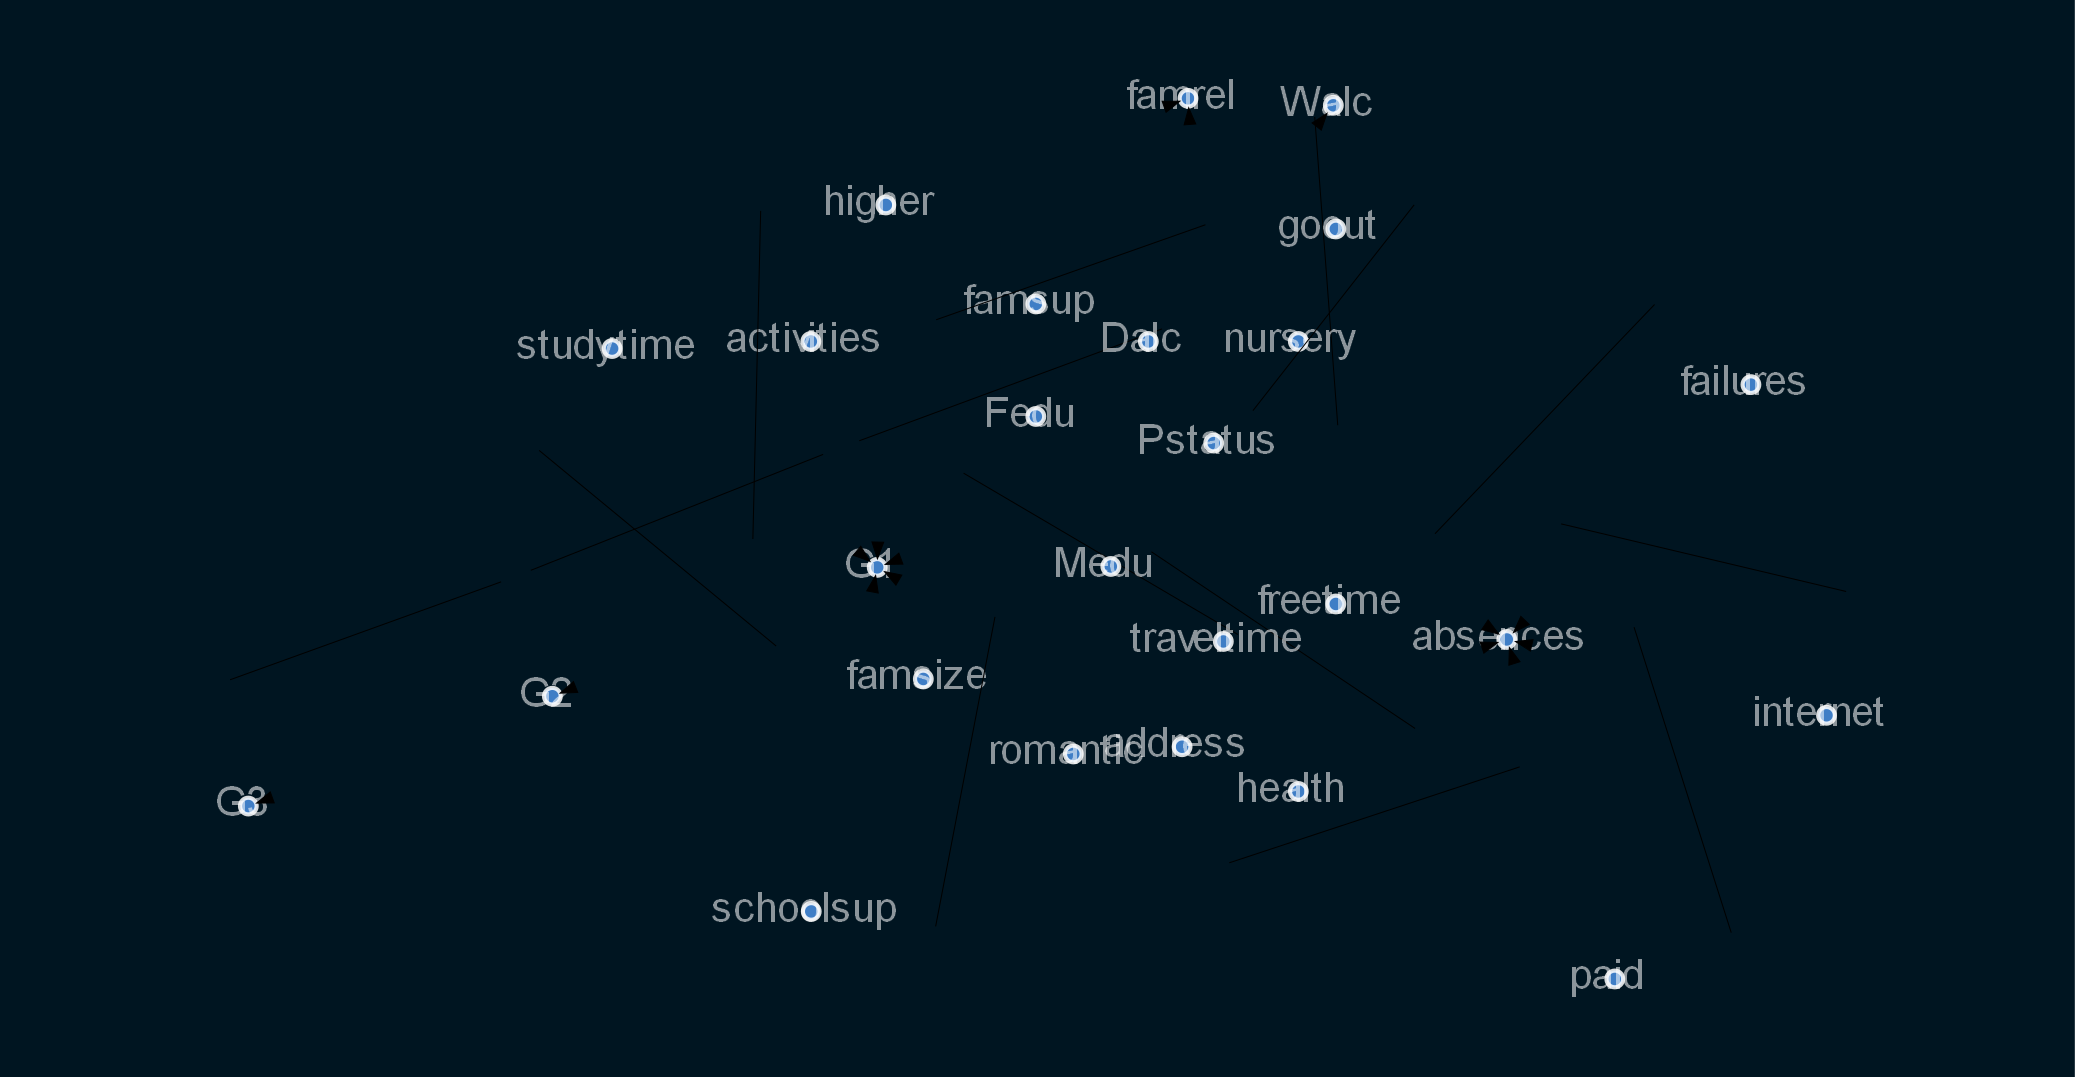

In [16]:
viz = plot_structure(
    sm,
    graph_attributes={"scale": "1"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
    
)
Image(viz.draw(format='png'))

In [18]:
warnings.filterwarnings("ignore")

from itertools import chain

edges = [
    ("Age", "SocioEcon", {"weight": 0.37}),
    ("SocioEcon", "OtherCar", {"weight": 0.95}),
    ("SocioEcon", "GoodStudent", {"weight": 0.73}),
    ("Age", "GoodStudent", {"weight": 0.6}),
    ("SocioEcon", "RiskAversion", {"weight": 0.16}),
    ("Age", "RiskAversion", {"weight": 0.16}),
    ("RiskAversion", "VehicleYear", {"weight": 0.06}),
    ("SocioEcon", "VehicleYear", {"weight": 0.87}),
    ("Accident", "ThisCarDam", {"weight": 0.6}),
    ("RuggedAuto", "ThisCarDam", {"weight": 0.71}),
    ("MakeModel", "RuggedAuto", {"weight": 0.02}),
    ("VehicleYear", "RuggedAuto", {"weight": 0.97}),
    ("Mileage", "Accident", {"weight": 0.83}),
    ("DrivQuality", "Accident", {"weight": 0.21}),
    ("Antilock", "Accident", {"weight": 0.18}),
    ("RiskAversion", "MakeModel", {"weight": 0.18}),
    ("SocioEcon", "MakeModel", {"weight": 0.3}),
    ("RiskAversion", "DrivQuality", {"weight": 0.52}),
    ("DrivingSkill", "DrivQuality", {"weight": 0.43}),
    ("MakeModel", "Antilock", {"weight": 0.29}),
    ("VehicleYear", "Antilock", {"weight": 0.61}),
    ("SeniorTrain", "DrivingSkill", {"weight": 0.14}),
    ("Age", "DrivingSkill", {"weight": 0.29}),
    ("RiskAversion", "SeniorTrain", {"weight": 0.37}),
    ("Age", "SeniorTrain", {"weight": 0.46}),
    ("Theft", "ThisCarCost", {"weight": 0.79}),
    ("CarValue", "ThisCarCost", {"weight": 0.2}),
    ("ThisCarDam", "ThisCarCost", {"weight": 0.51}),
    ("HomeBase", "Theft", {"weight": 0.59}),
    ("AntiTheft", "Theft", {"weight": 0.05}),
    ("CarValue", "Theft", {"weight": 0.61}),
    ("Mileage", "CarValue", {"weight": 0.17}),
    ("MakeModel", "CarValue", {"weight": 0.07}),
    ("VehicleYear", "CarValue", {"weight": 0.95}),
    ("RiskAversion", "HomeBase", {"weight": 0.97}),
    ("SocioEcon", "HomeBase", {"weight": 0.81}),
    ("RiskAversion", "AntiTheft", {"weight": 0.3}),
    ("SocioEcon", "AntiTheft", {"weight": 0.1}),
    ("OtherCarCost", "PropCost", {"weight": 0.68}),
    ("ThisCarCost", "PropCost", {"weight": 0.44}),
    ("Accident", "OtherCarCost", {"weight": 0.12}),
    ("RuggedAuto", "OtherCarCost", {"weight": 0.5}),
    ("Accident", "MedCost", {"weight": 0.03}),
    ("Cushioning", "MedCost", {"weight": 0.91}),
    ("Age", "MedCost", {"weight": 0.26}),
]
g = StructureModel(edges)

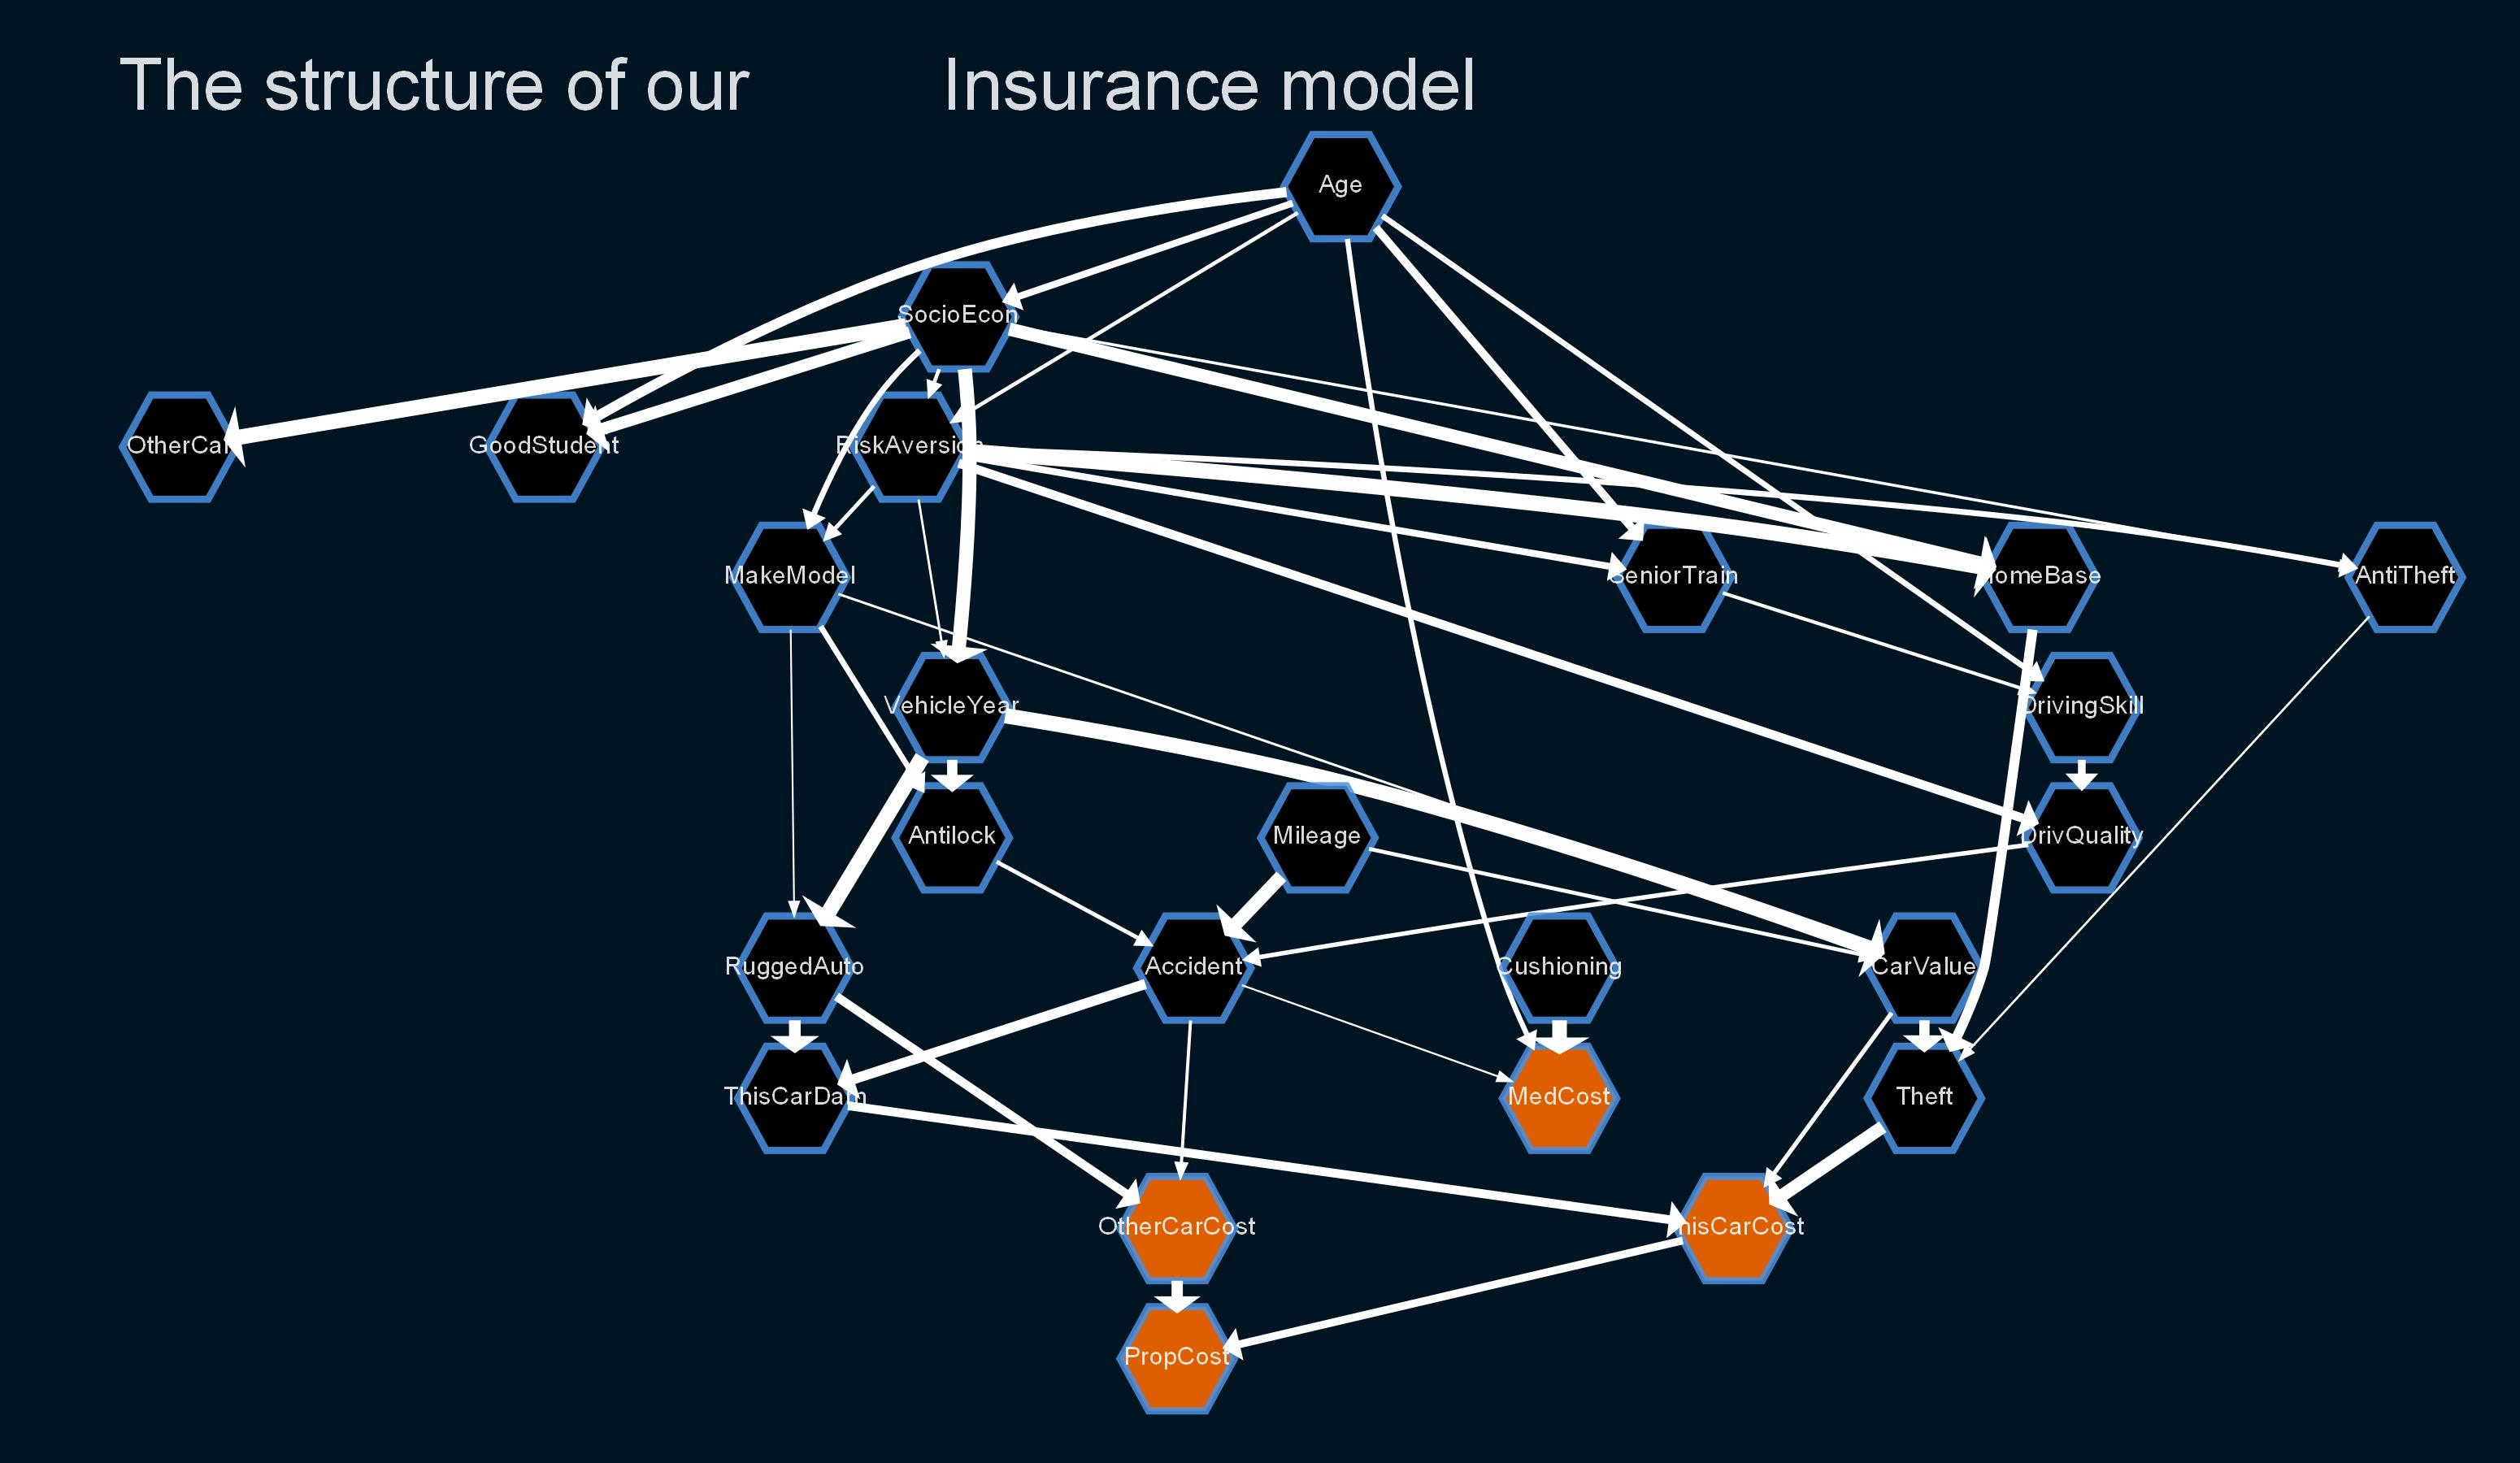

In [24]:
graph_attributes = {
    "splines": "spline",  # I use splies so that we have no overlap
    "ordering": "out",
    "ratio": "fill",  # This is necessary to control the size of the image
    "size": "16,9!",  # Set the size of the final image. (this is a typical presentation size)
    "label": "The structure of our\n \t Insurance model",
    "fontcolor": "#FFFFFFD9",
    "fontname": "Helvetica",
    "fontsize": 100,
    "labeljust": "l",
    "labelloc": "t",
    "pad": "1,1",
    "dpi": 200,
    "nodesep": 0.8,
    "ranksep": ".5 equally",
}

# Making all nodes hexagonal with black coloring
node_attributes = {
    node: {
        "shape": "hexagon",
        "width": 2.2,
        "height": 2,
        "fillcolor": "#000000",
        "penwidth": "10",
        "color": "#4a90e2d9",
        "fontsize": 35,
        "labelloc": "c",
    }
    for node in g.nodes
}

# Splitting two words with "\n"
for node in g.nodes:
    up_idx = [i for i, c in enumerate(node) if c.isupper()][-1]
    node_attributes[node]["label"] = node[:up_idx] + "\n" + node[up_idx:]

# Target nodes (ones with "Cost" in the name) are colored differently
for node in g.nodes:
    if "Cost" in node:  # We color nodes with "cost" in the name with a orange colour.
        node_attributes[node]["fillcolor"] = "#DF5F00"

# Customising edges
edge_attributes = {
    (u, v): {
        "penwidth": w * 20 + 2,  # Setting edge thickness
        "weight": int(5 * w),  # Higher "weight"s mean shorter edges
        "arrowsize": 2 - 2.0 * w,  # Avoid too large arrows
        "arrowtail": "dot",
        "color": "white"
    }
    for u, v, w in g.edges(data="weight")
}


viz = plot_structure(
    g,
    prog="dot",
    graph_attributes=graph_attributes,
    node_attributes=node_attributes,
    edge_attributes=edge_attributes,
)
f = "insurance_model.jpg"
viz.draw(f)
Image(f)

In [3]:

import os
import json
import pandas as pd

def count_graph_nodes_and_links(file):
    with open(file + ".json") as f:
        graph_1 = json.loads(f.read())
    list_graph_nodes = [x["id"] for x in graph_1["graph"]["nodes"]]
    df_graph_links = pd.DataFrame([x for x in graph_1["graph"]["links"]])
    return df_graph_links, list_graph_nodes


def get_free_nodes(df_links, list_nodes):
    free_nodes = []
    for node in list_nodes:
        if(node not in list(df_links["target"]) and node not in list(df_links["source"]) ):
            free_nodes.append(node)
    return free_nodes

print("Ok")

Ok


In [4]:
df_XGB_links, list_XGB_nodes  = count_graph_nodes_and_links("polaris_marsexpress_graphs/polaris_graph_XGB")
df_randomforest_links, list_randomforest_nodes = count_graph_nodes_and_links("polaris_marsexpress_graphs/polaris_graph_randomforest")
df_adaboost_links, list_adaboost_nodes = count_graph_nodes_and_links("polaris_marsexpress_graphs/polaris_graph_adaboost")
df_extratrees_links, list_extratrees_nodes = count_graph_nodes_and_links("polaris_marsexpress_graphs/polaris_graph_extratrees")
df_gradientboosting_links, list_gradientboosting_nodes = count_graph_nodes_and_links("polaris_marsexpress_graphs/polaris_graph_GradientBoosting")

display(df_XGB_links)

,source,target,value
0,NPWD2372,NPWD2491,0.114444
1,NPWD2401,NPWD2471,0.257266
2,NPWD2401,NPWD2482,0.607478
3,NPWD2472,NPWD2792,0.327523
4,NPWD2472,NPWD2801,0.105567
...,...,...,...
127,SLEW,NADIR,0.292761
128,SLEW,RADIO_SCIENCE,0.181101
129,WARMUP,NPWD2722,0.169065
130,WARMUP,MAINTENANCE,0.226871


In [23]:

edges = []
for i, row in df_XGB_links.iterrows():
    edges.append((row["source"], row["target"], {"weight": row["value"]}))

g = StructureModel(edges)


[('NPWD2372', 'NPWD2491', {'weight': 0.11444403976202011}),
 ('NPWD2401', 'NPWD2471', {'weight': 0.25726571679115295}),
 ('NPWD2401', 'NPWD2482', {'weight': 0.6074777245521545}),
 ('NPWD2472', 'NPWD2792', {'weight': 0.3275226950645447}),
 ('NPWD2472', 'NPWD2801', {'weight': 0.10556660592556}),
 ('NPWD2472', 'PSF', {'weight': 0.15645262598991394}),
 ('NPWD2482', 'NPWD2401', {'weight': 0.7571135759353638}),
 ('NPWD2482', 'NPWD2722', {'weight': 0.16310174763202667}),
 ('NPWD2491', 'NPWD2372', {'weight': 0.22958455979824066}),
 ('NPWD2501', 'NPWD2801', {'weight': 0.12402145564556122}),
 ('NPWD2531', 'NPWD2851', {'weight': 0.26132094860076904}),
 ('NPWD2532', 'DMF', {'weight': 0.21216055750846863}),
 ('NPWD2561', 'NPWD2881', {'weight': 0.18623308837413788}),
 ('NPWD2562', 'NPWD2402', {'weight': 0.2562132179737091}),
 ('NPWD2562', 'HHH', {'weight': 0.3449964225292206}),
 ('NPWD2562', 'DMC', {'weight': 0.30935007333755493}),
 ('NPWD2691', 'NPWD2501', {'weight': 0.11457157135009766}),
 ('NPWD2

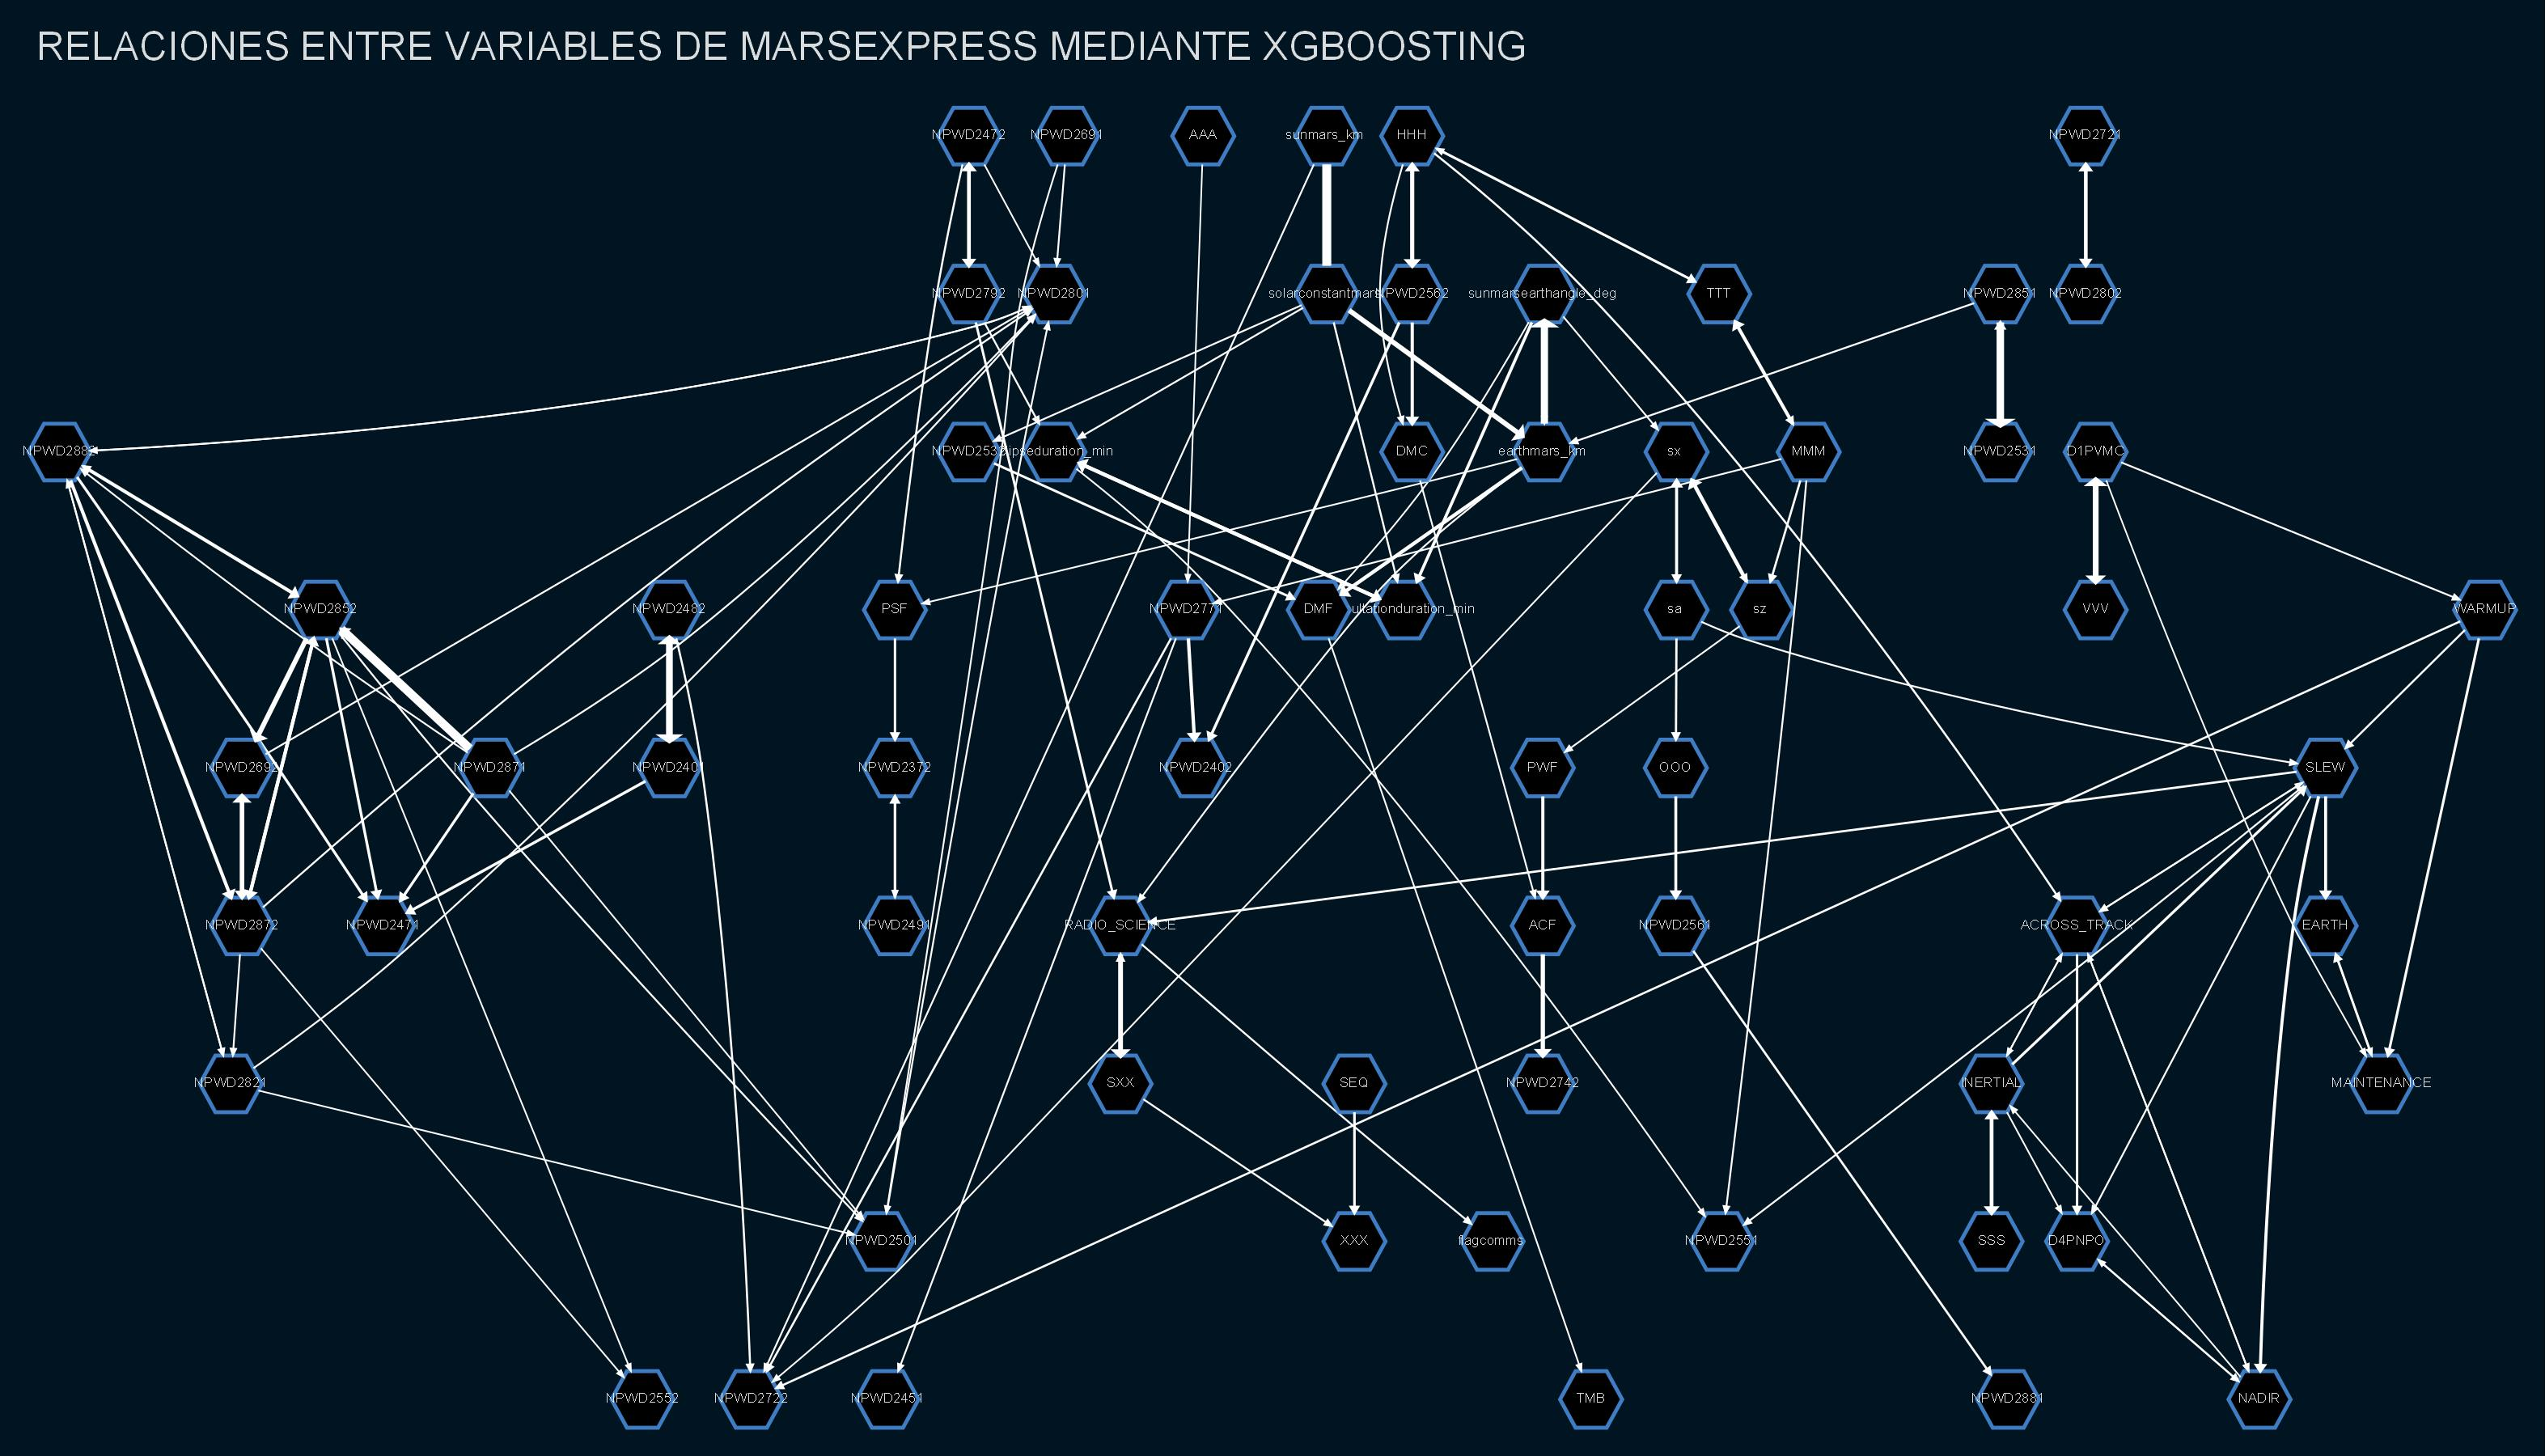

In [32]:
graph_attributes = {
    "splines": "spline",  # I use splies so that we have no overlap
    "ordering": "out",
    "ratio": "fill",  # This is necessary to control the size of the image
    "size": "16,9!",  # Set the size of the final image. (this is a typical presentation size)
    "label": "RELACIONES ENTRE VARIABLES DE MARSEXPRESS MEDIANTE XGBOOSTING",
    "fontcolor": "#FFFFFFD9",
    "fontname": "Helvetica",
    "fontsize": 100,
    "labeljust": "l",
    "labelloc": "t",
    "pad": "1,1",
    "dpi": 200,
    "nodesep": 0.8,
    "ranksep": ".5 equally",
}

# Making all nodes hexagonal with black coloring
node_attributes = {
    node: {
        "shape": "hexagon",
        "width": 2.2,
        "height": 2,
        "fillcolor": "#000000",
        "penwidth": "10",
        "color": "#4a90e2d9",
        "fontsize": 35,
        "labelloc": "c",
    }
    for node in g.nodes
}

# Splitting two words with "\n"
for node in g.nodes:
    up_idx_array_origin = [i for i, c in enumerate(node) if c.isupper()]
    if len(up_idx_array_origin) > 0:
        up_idx = [up_idx_array_origin][-1][-1]
        node_attributes[node]["label"] = node[:up_idx] + "\n" + node[up_idx:]

# Target nodes (ones with "Cost" in the name) are colored differently
for node in g.nodes:
    if "Cost" in node:  # We color nodes with "cost" in the name with a orange colour.
        node_attributes[node]["fillcolor"] = "#DF5F00"

# Customising edges
edge_attributes = {
    (u, v): {
        "penwidth": w * 20 + 2,  # Setting edge thickness
        "weight": int(5 * w),  # Higher "weight"s mean shorter edges
        "arrowsize": 2 - 2.0 * w,  # Avoid too large arrows
        "arrowtail": "dot",
        "color": "white"
    }
    for u, v, w in g.edges(data="weight")
}


viz = plot_structure(
    g,
    prog="dot",
    graph_attributes=graph_attributes,
    node_attributes=node_attributes,
    edge_attributes=edge_attributes,
)
f = "insurance_model.jpg"
viz.draw(f)
Image(f)